## Library

In [37]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## Load Dataset

In [38]:
df = pd.read_csv("../hasil_preprocessing.csv")   
df = df.dropna(subset=["Comment"])  
texts = df["Comment"].astype(str).tolist()

In [39]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)


# K-Means

## Inisialisasi K-Means

In [40]:
k = 3

kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

df["cluster"] = kmeans.labels_


In [41]:
print(df[["Comment", "cluster"]].head())

                                             Comment  cluster
0  apa jadi sudah jadi maaf apa komentar kecewa k...        1
1  sedikit tarik sama bahas u anggap sukses bawah...        2
2                                  spill bobrok pssi        1
3  inti semua salah sty gara harap masuk piala du...        2
4  latih asal belanda banyak latih asal negara pa...        2


## Visualisasi K-Means

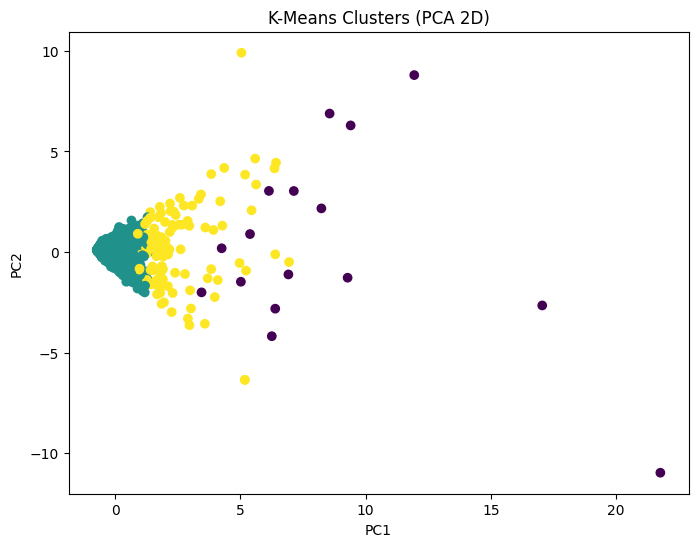

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans.labels_, cmap="viridis")
plt.title("K-Means Clusters (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

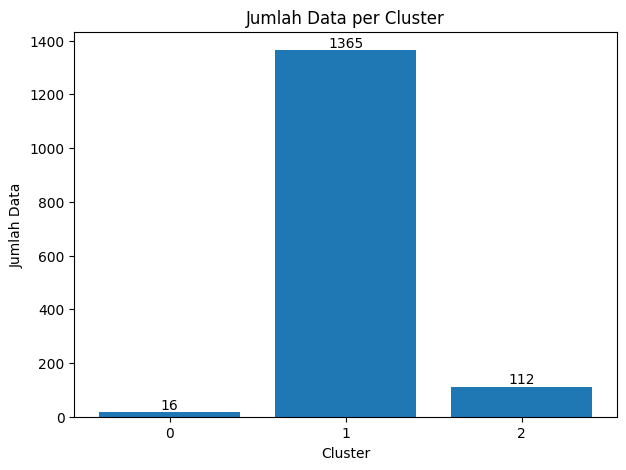

In [ ]:
cluster_counts = df["cluster"].value_counts().sort_index()

plt.figure(figsize=(7,5))
bars = plt.bar(cluster_counts.index, cluster_counts.values)

plt.title("Jumlah Data per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Jumlah Data")
plt.xticks(cluster_counts.index)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        str(height),
        ha='center', va='bottom', fontsize=10
    )

plt.show()


# Topic Modelling

## Inisialisasi Topic Modelling

In [ ]:
vectorizer = CountVectorizer()
X_cluster = vectorizer.fit_transform(df["Comment"])  
words = vectorizer.get_feature_names_out()

cluster_topics = {}

for c in sorted(df["cluster"].unique()):
    texts_c = df[df["cluster"] == c]["Comment"]

    X_c = vectorizer.fit_transform(texts_c)
    words_c = vectorizer.get_feature_names_out()

    counts = X_c.sum(axis=0).A1
    sorted_idx = counts.argsort()[::-1]  

    top_words = [words_c[i] for i in sorted_idx[:10]]
    
    cluster_topics[c] = top_words
    print(f"Cluster {c} → {', '.join(top_words)}\n")



Cluster 0 → main, latih, indonesia, jadi, bola, sepak, timnas, orang, sepakbola, bukan

Cluster 1 → latih, sty, orang, indonesia, sama, jadi, belanda, buat, timnas, pssi

Cluster 2 → main, latih, sty, timnas, sama, jadi, kamu, indonesia, lawan, buat



In [ ]:
topic_labels = {}

for c, words in cluster_topics.items():
    label = " / ".join(words[:3])
    topic_labels[c] = label

topic_labels


{np.int32(0): 'main / latih / indonesia',
 np.int32(1): 'latih / sty / orang',
 np.int32(2): 'main / latih / sty'}

In [46]:
df["topic_label"] = df["cluster"].map(topic_labels)


In [47]:
print("=== Topic Labeling ===")
for c, label in topic_labels.items():
    print(f"Cluster {c}: {label}")


=== Topic Labeling ===
Cluster 0: main / latih / indonesia
Cluster 1: latih / sty / orang
Cluster 2: main / latih / sty


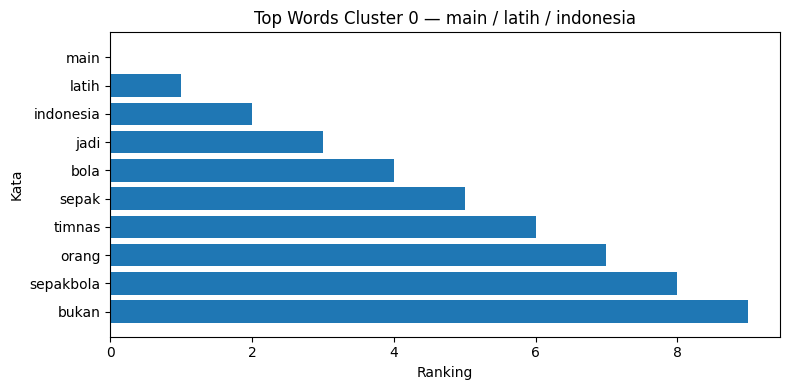

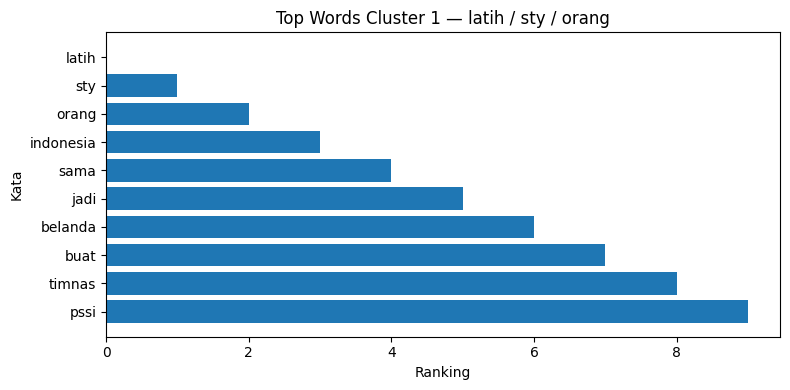

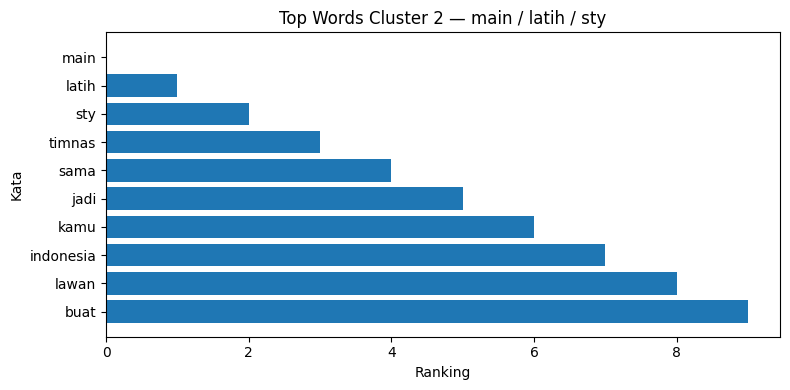

In [48]:
import matplotlib.pyplot as plt

for c, words in cluster_topics.items():
    plt.figure(figsize=(8,4))
    counts = list(range(len(words[:10])))

    plt.barh(words[:10][::-1], counts[::-1])
    plt.title(f"Top Words Cluster {c} — {topic_labels[c]}")
    plt.xlabel("Ranking")
    plt.ylabel("Kata")
    plt.tight_layout()
    plt.show()
